In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved ??$#s output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2

In [3]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
dir = "/kaggle/input/hindi-character-recognition/DevanagariHandwrittenCharacterDataset"

In [5]:
def get_array_from_images(need ):
    dir = "/kaggle/input/hindi-character-recognition/DevanagariHandwrittenCharacterDataset"
    data = []
    labels = []
    
    path = os.path.join(dir, need)

    for files in os.listdir(path):
        each_words_dir = os.path.join(path,files)
        for img in os.listdir(each_words_dir):
            img_path = os.path.join(each_words_dir, img)
            img_array = cv.imread(img_path)
            data.append(img_array)
            labels.append(files)


    return (np.array(data), np.array(labels))        
    

In [6]:
print(os.listdir())

['__notebook__.ipynb']


In [7]:
X_train, y_train = get_array_from_images('Train' )
X_test, y_test = get_array_from_images("Test")

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [10]:
# print(len(np.unique(y_test)))  # Print the number of unique labels


In [11]:
# # Data Augmentation Configuration
# train_datagen = ImageDataGenerator(
#     rescale=1./255,                # Normalize the images to [0, 1]
#     rotation_range=40,             # Random rotation between -40 and 40 degrees
#     width_shift_range=0.2,         # Random width shift (20% of the width)
#     height_shift_range=0.2,        # Random height shift (20% of the height)
#     shear_range=0.2,               # Random shear (distort the image)
#     zoom_range=0.2,                # Random zoom (20% zoom)
#     horizontal_flip=True,          # Randomly flip the image horizontally
#     fill_mode='nearest',           # Fill newly created pixels after transformation with the nearest value
#     brightness_range=[0.5, 1.5]    # Randomly adjust brightness (50% dim to 50% bright)
# )

In [12]:
# # Apply the same augmentation to your training data
# train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

In [13]:
# # Validation Data Augmentation (no transformation, just rescaling)
# val_datagen = ImageDataGenerator(rescale=1./255)
# val_generator = val_datagen.flow(X_test, y_test, batch_size=32)

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),

    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),

    Dense(46, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 46)                  │          23,598 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,790 (717.93 KB)

 Trainable params: 183,342 (716.18 KB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 33)

In [18]:
len(X_val)

15640

In [19]:
epochs = 20

In [20]:
history = model.fit(X_train, y_train,batch_size = 32, epochs = epochs, validation_data = (X_val, y_val)) 

# history = model.fit(
#     train_generator, 
#     epochs=20, 
#     validation_data=val_generator, 
#     steps_per_epoch=len(X_train) // 32,  # Number of batches per epoch
#     validation_steps=len(X_test) // 32  # Number of validation batches per epoch
# )


Epoch 1/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6709 - loss: 2.0229 - val_accuracy: 0.9457 - val_loss: 0.3942
Epoch 2/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9402 - loss: 0.4029 - val_accuracy: 0.9654 - val_loss: 0.3005
Epoch 3/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9573 - loss: 0.3179 - val_accuracy: 0.9698 - val_loss: 0.2719
Epoch 4/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9630 - loss: 0.2845 - val_accuracy: 0.9670 - val_loss: 0.2964
Epoch 5/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9665 - loss: 0.2735 - val_accuracy: 0.9713 - val_loss: 0.2640
Epoch 6/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9705 - loss: 0.2552 - val_accuracy: 0.9650 - val_loss: 0.2963
Epoch 7/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9686 - loss: 0.2659 - val_accuracy: 0.9738 - val_loss: 0.2465
Epoch 8/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9718 - loss: 0.2518 -

In [21]:

combined = list(zip(X_test, y_test))

np.random.shuffle(combined)

X_test, y_test = zip(*combined)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [22]:
y_pred = model.predict(X_test)

432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [23]:
y_pred = np.argmax(y_pred, axis = 1)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       300
           1       0.99      0.97      0.98       300
           2       0.96      0.99      0.98       300
           3       0.95      0.99      0.97       300
           4       0.97      0.97      0.97       300
           5       0.98      1.00      0.99       300
           6       0.95      0.99      0.97       300
           7       0.96      0.97      0.96       300
           8       0.98      0.96      0.97       300
           9       1.00      0.93      0.96       300
          10       1.00      0.97      0.98       300
          11       0.98      0.98      0.98       300
          12       0.97      0.98      0.98       300
          13       0.98      0.99      0.99       300
          14       0.98      0.94      0.96       300
          15       0.99      0.97      0.98       300
          16       0.98      0.99      0.99       300
          17       0.96    

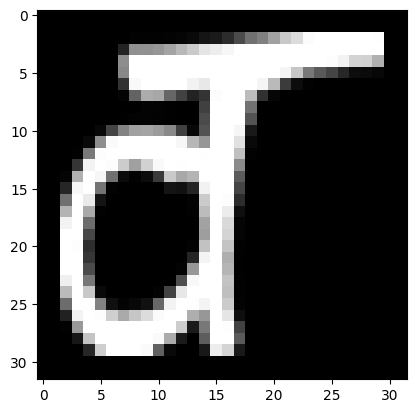

In [25]:
plt.imshow(X_test[0])

In [26]:
accuracy_score(y_test, y_pred)

0.9782608695652174

In [27]:
np.where(y_test == 19)

(array([   22,    75,   163,   269,   423,   500,   510,   562,   679,
          690,   694,   755,   781,   793,   843,   845,   846,   869,
          894,   932,   962,   978,   981,   984,  1038,  1083,  1094,
         1232,  1249,  1294,  1393,  1412,  1461,  1485,  1501,  1569,
         1611,  1612,  1735,  1769,  1855,  1907,  1983,  1996,  1997,
         2026,  2089,  2149,  2286,  2359,  2402,  2436,  2469,  2472,
         2552,  2558,  2560,  2614,  2634,  2668,  2690,  2694,  2723,
         2750,  2826,  2829,  2872,  2984,  2988,  3056,  3081,  3196,
         3232,  3257,  3280,  3302,  3376,  3398,  3436,  3442,  3452,
         3482,  3530,  3540,  3563,  3664,  3675,  3750,  3780,  3860,
         3917,  3975,  4043,  4063,  4083,  4135,  4153,  4198,  4208,
         4242,  4271,  4457,  4504,  4560,  4590,  4599,  4688,  4744,
         4752,  4775,  4865,  4907,  4937,  5088,  5184,  5200,  5218,
         5248,  5254,  5315,  5438,  5522,  5565,  5576,  5607,  5641,
      

In [28]:
# Visualize training history
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

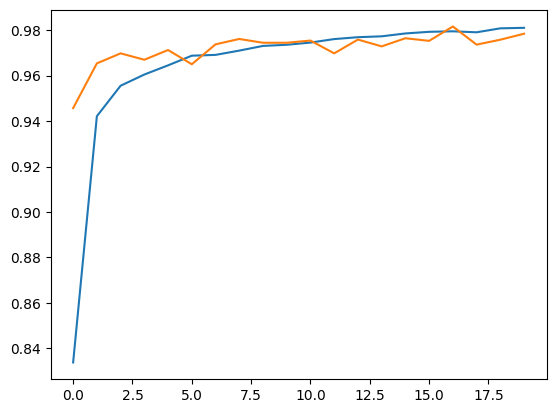

In [29]:
plt.plot(range(0, epochs), history.history['accuracy'])
plt.plot(range(0, epochs), history.history['val_accuracy'])

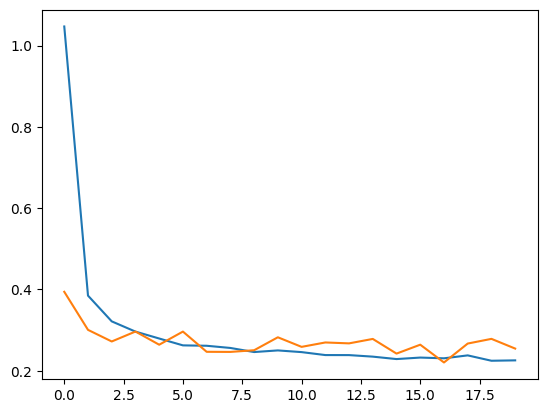

In [30]:
plt.plot(range(0, epochs), history.history['loss'])
plt.plot(range(0, epochs), history.history['val_loss'])

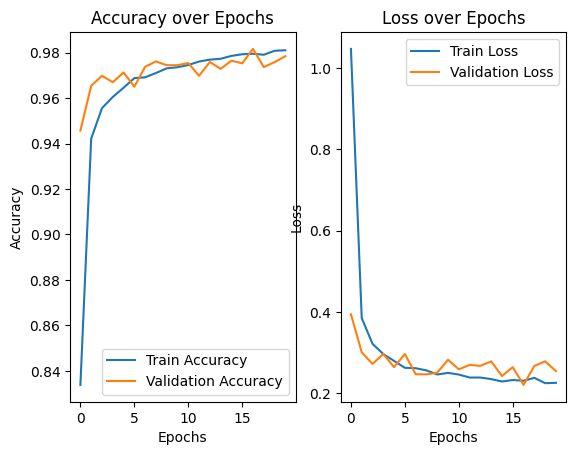

In [31]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [32]:
model.save('ocr_model_46.h5')

In [33]:
import os

# List files in the working directory
print(os.listdir('/kaggle/working'))


['__notebook__.ipynb', 'ocr_model_46.h5']


In [34]:
from IPython.display import FileLink

# Create a direct download link
FileLink('ocr_model_with_augmentation.h5')


/kaggle/working/ocr_model_with_augmentation.h5

In [35]:
# from tensorflow.keras.models import load_model

# # Load the downloaded model
# model = load_model('/kaggle/input/ocr_model/tensorflow2/default/1/ocr_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1955/1955 ━━━━━━━━━━━━━━━━━━━━ 56s 26ms/step - accuracy: 0.2917 - loss: 3.3522 - val_accuracy: 0.8109 - val_loss: 0.8836
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1955/1955 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8109 - val_loss: 0.8836
Epoch 3/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 48s 24ms/step - accuracy: 0.6659 - loss: 1.3761 - val_accuracy: 0.8824 - val_loss: 0.6449
Epoch 4/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8824 - val_loss: 0.6449
Epoch 5/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - accuracy: 0.7204 - loss: 1.1853 - val_accuracy: 0.8641 - val_loss: 0.6871
Epoch 6/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8641 - val_loss: 0.6871
Epoch 7/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - accuracy: 0.7451 - loss: 1.0894 - val_accuracy: 0.8599 - val_loss: 0.7097
Epoch 8/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8599 - val_loss: 0.7097
Epoch 9/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step

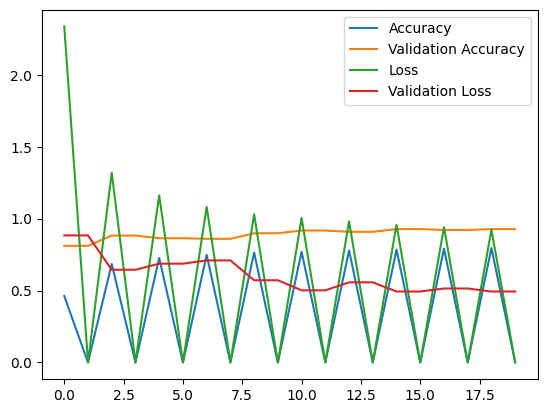

In [36]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to dataset
dir = "/kaggle/input/hindi-character-recognition/DevanagariHandwrittenCharacterDataset"

def get_array_from_images(need):
    data = []
    labels = []
    path = os.path.join(dir, need)

    for files in os.listdir(path):
        each_words_dir = os.path.join(path, files)
        for img in os.listdir(each_words_dir):
            img_path = os.path.join(each_words_dir, img)
            img_array = cv.imread(img_path)
            img_array = cv.resize(img_array, (32, 32))  # Resize images to 32x32
            data.append(img_array)
            labels.append(files)

    return (np.array(data), np.array(labels))

# Load training and test data
X_train, y_train = get_array_from_images('Train')
X_test, y_test = get_array_from_images("Test")

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Initialize LabelEncoder to convert labels to integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Data Augmentation using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen.fit(X_train)

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),

    Dense(46, activation='softmax')  
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

# Train the model with data augmentation
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,
    steps_per_epoch=len(X_train) // 32
)

# Test the model on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Print the classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Optionally visualize accuracy and loss over epochs
plt.plot(range(0, 20), history.history['accuracy'], label='Accuracy')
plt.plot(range(0, 20), history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(range(0, 20), history.history['loss'], label='Loss')
plt.plot(range(0, 20), history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Save the model for future use
model.save('hindi_ocr_model_2.h5')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1955/1955 ━━━━━━━━━━━━━━━━━━━━ 54s 25ms/step - accuracy: 0.3919 - loss: 3.2671 - val_accuracy: 0.9102 - val_loss: 0.5672
Epoch 2/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8232 - loss: 0.8533 - val_accuracy: 0.9259 - val_loss: 0.4805
Epoch 3/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.8581 - loss: 0.7177 - val_accuracy: 0.9320 - val_loss: 0.4545
Epoch 4/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.8781 - loss: 0.6422 - val_accuracy: 0.9488 - val_loss: 0.4256
Epoch 5/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 0.8916 - loss: 0.5989 - val_accuracy: 0.9625 - val_loss: 0.3670
Epoch 6/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.8929 - loss: 0.5934 - val_accuracy: 0.9607 - val_loss: 0.3631
Epoch 7/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 0.9025 - loss: 0.5555 - val_accuracy: 0.9709 - val_loss: 0.3365
Epoch 8/20
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.9044 - loss: 0.54

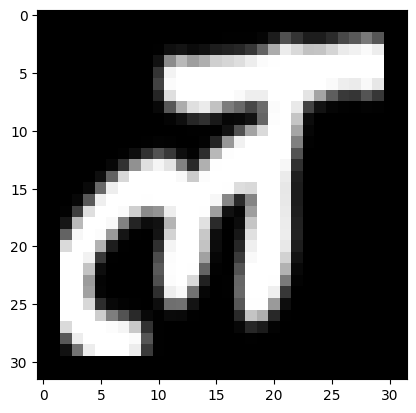

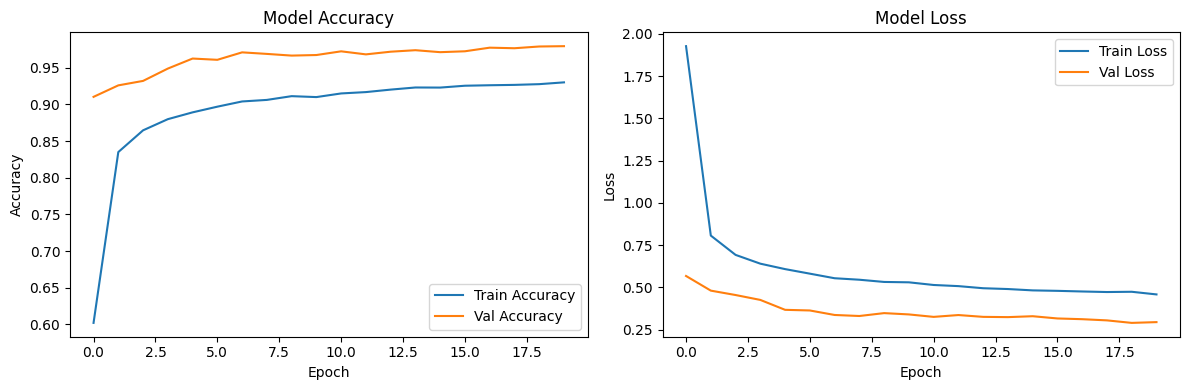

In [37]:
import numpy as np
import os
import cv2 as cv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Define directory for the dataset
dir = "/kaggle/input/hindi-character-recognition/DevanagariHandwrittenCharacterDataset"

# Function to read the images and labels from the dataset
def get_array_from_images(need):
    data = []
    labels = []
    
    path = os.path.join(dir, need)

    # Loop through each directory (each character) and read the images
    for files in os.listdir(path):
        each_words_dir = os.path.join(path, files)
        for img in os.listdir(each_words_dir):
            img_path = os.path.join(each_words_dir, img)
            img_array = cv.imread(img_path)
            img_array = cv.resize(img_array, (32, 32))  # Resize image to 32x32
            data.append(img_array)
            labels.append(files)  # Label is the character

    return np.array(data), np.array(labels)

# Load and preprocess the data
X_train, y_train = get_array_from_images('Train')
X_train = X_train / 255.0  # Normalize pixel values to [0, 1]

X_test, y_test = get_array_from_images("Test")
X_test = X_test / 255.0  # Normalize pixel values to [0, 1]

# Label encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Save the LabelEncoder classes for future use
np.save('label_classes.npy', le.classes_)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

# Set up ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,        # Random rotations
    width_shift_range=0.2,    # Random horizontal shifts
    height_shift_range=0.2,   # Random vertical shifts
    shear_range=0.2,          # Random shearing
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest'       # Pixel filling method for empty space
)

val_datagen = ImageDataGenerator()

# Create generators for training and validation
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
input_size = (32, 32, 3)
# Define the model
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_size, padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),

    Dense(46, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model with augmented data
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Testing the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Evaluation
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Visualize some test results
np.where(y_test == 19)  # Example: find indices of a specific label (e.g., label 19)
plt.imshow(X_test[0])  # Display the first image from the test set
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history.history['accuracy'], label='Train Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history.history['loss'], label='Train Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the trained model
model.save('ocr_model_with_augmentation.h5')


In [38]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Define the dataset directory
dir = "/kaggle/input/hindi-character-recognition/DevanagariHandwrittenCharacterDataset"

# Function to read labels from the dataset
def get_labels(need):
    labels = []
    path = os.path.join(dir, need)

    # Loop through each directory (each character) to collect labels
    for files in os.listdir(path):
        labels.append(files)  # Each folder name corresponds to a label

    return np.array(labels)

# Get unique labels from the training dataset
unique_labels = get_labels('Train')

# Encode the labels and save to a file
le = LabelEncoder()
le.fit(unique_labels)  # Fit the LabelEncoder with the unique labels
np.save('label_classes.npy', le.classes_)  # Save the label classes

print("Label classes saved as 'label_classes.npy'")


Label classes saved as 'label_classes.npy'
